<h1>Introduction</h1>
<br>
Hand Keypoint detection is the process of finding the joints on the fingers as well as the finger-tips in a given image.<br><br>
The researchers at CMU Perceptual Computing Lab have also released models for keypoint detection of Hand and Face along with the body.They start with a small set of labelled hand images and use a neural network ( Convolutional Pose Machines – similar to Body Pose ) to get rough estimates of the hand keypoints. They have a huge multi-view system set up to take images from different view-points or angles comprising of 31 HD cameras.They pass these images through the detector to get many rough keypoint predictions. Once you get the detected keypoints of the same hand from different views, Keypoint triangulation is performed to get the 3D location of the keypoints. The 3D location of keypoints is used to robustly predict the keypoints through reprojection from 3D to 2D. This is especially crucial for images where keypoints are difficult to predict. This way they get a much improved detector in a few iterations.
<br>
<h2>Summary</h2>

n summary, they use keypoint detectors and multi-view images to come up with an improved detector. The detection architecture used is similar to the one used for body pose. The main source of improvement is the multi-view images for the labelled set of images.

The model produces 22 keypoints. The hand has 21 points while the 22nd point signifies the background

<b>Lets See How Model Works in Jupyter Notebook </b>



In [1]:
from __future__ import division
import cv2
import time
import numpy as np
from matplotlib import pyplot as plt


<b>Upload the Model and Image</b> 
<br>
First, we will load the image and the model into memory. Make sure you have the model downloaded and in the correct folder as specified in the variable.

In [2]:

protoFile = "hand/pose_deploy.prototxt"
weightsFile = "hand/pose_iter_102000.caffemodel"
nPoints = 22
POSE_PAIRS = [ [0,1],[1,2],[2,3],[3,4],[0,5],[5,6],[6,7],[7,8],[0,9],[9,10],[10,11],[11,12],[0,13],[13,14],[14,15],[15,16],[0,17],[17,18],[18,19],[19,20] ]
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

frame = cv2.imread("hand.jpg")
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
aspect_ratio = frameWidth/frameHeight

<b>Get Predictions</b>
<br>
We convert the BGR image to blob so that it can be fed to the network. Then we do a forward pass to get the predictions.
   

In [3]:
threshold = 0.1

t = time.time()
# input image dimensions for the network
inHeight = 368
inWidth = int(((aspect_ratio*inHeight)*8)//8)
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()

<b>Show Detections</b>
<br>

The output has 22 matrices with each matrix being the Probability Map of a keypoint. Given below is the probability heatmap superimposed on the original image for the keypoint belonging to the tip of thumb and base of little finger.
For finding the exact keypoints, first, we scale the probabilty map to the size of the original image. Then find the location of the keypoint by finding the maxima of the probability map. This is done using the minmaxLoc function in OpenCV. We draw the detected points along with the numbering on the image.

<h2>One thing is important to note here that Predicted keypoints by the model, we are only intrested in kepoints
    No: 6, 10, 14, 18, which correponds to each finger in the hand, rest of the 18 keypoints we excluded from the output</h2>

In [4]:
points = []

#We are only intrested in these points for rings in the hand.

finger1 = 6
finger2 = 10
finger3 = 14
finger4 = 18

counter = 0

In [7]:
for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (frameWidth, frameHeight))

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    if counter == 6:

        if prob > threshold:



            cv2.circle(frameCopy, (int(point[0]), int(point[1])), 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

            # Add the point to the list if the probability is greater than the threshold

            points.append((int(point[0]), int(point[1])))
        else:
            points.append(None)
    if counter == 10:

        if prob > threshold:



            cv2.circle(frameCopy, (int(point[0]), int(point[1])), 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

            # Add the point to the list if the probability is greater than the threshold

            points.append((int(point[0]), int(point[1])))
        else:
            points.append(None)
    if counter == 14:

        if prob > threshold:


            cv2.circle(frameCopy, (int(point[0]), int(point[1])), 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

            # Add the point to the list if the probability is greater than the threshold

            points.append((int(point[0]), int(point[1])))
        else:
            points.append(None)
    if counter == 18:

        if prob > threshold:


            cv2.circle(frameCopy, (int(point[0]), int(point[1])), 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

            # Add the point to the list if the probability is greater than the threshold

            points.append((int(point[0]), int(point[1])))
        else:
            points.append(None)
    counter += 1

    
    



In [8]:
print("List of Finger Indexes" )
print(points)

List of Finger Indexes
[(124, 152), (153, 153), (180, 180), (199, 208)]


<function matplotlib.pyplot.show(*args, **kw)>

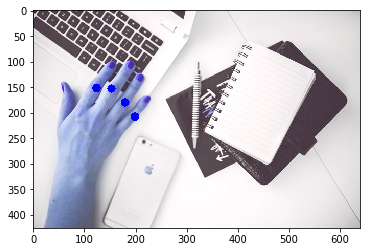

In [9]:
plt.imshow(frameCopy)
plt.show